<a href="https://colab.research.google.com/github/vihan-lakshman/mutagenic/blob/main/robin's_copy_of_masking_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation Dataset

In [ ]:

import torch
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
df = pd.read_csv('/content/prelim-deletion-validation-dataset-functional-annotations-with-interpro.csv')
# df = pd.read_csv('/content/subset_nonfunctional_DMS_substitutions_with_interpro.csv')

In [ ]:
!pip install blosum
import blosum as bl
matrix = bl.BLOSUM(80)

In [ ]:
!nvidia-smi

Mon Dec  9 18:01:38 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              49W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
df.columns

Index(['Entry', 'id', 'sequence', 'truncated_seq', 'del_start', 'del_end',
       'Protein names', 'Organism', 'Length', 'EC number', 'InterPro',
       'Gene Ontology (GO)', 'Gene Ontology IDs',
       'Gene Ontology (molecular function)',
       'Gene Ontology (cellular component)',
       'Gene Ontology (biological process)', 'Subcellular location [CC]'],
      dtype='object')

In [ ]:
print(len(df))

200


In [ ]:
df.head()

,Entry,id,sequence,truncated_seq,del_start,del_end,Protein names,Organism,Length,EC number,InterPro,Gene Ontology (GO),Gene Ontology IDs,Gene Ontology (molecular function),Gene Ontology (cellular component),Gene Ontology (biological process),Subcellular location [CC]
0,Q80WR5,sp|Q80WR5|CA174_MOUSE,MRSRKLTGGVRSSARLRARSYSSASLASARDVTSSTSAKTTCLASS...,MRSRKLTGGVRSSARLRARSYSSASLASARDVTSSTSAKKATDRRT...,39,47,UPF0688 protein C1orf174 homolog,Mus musculus (Mouse),230,NaN,IPR031530;,nucleoplasm [GO:0005654],GO:0005654,NaN,nucleoplasm [GO:0005654],NaN,SUBCELLULAR LOCATION: Nucleus {ECO:0000250}.
1,Q10N20,sp|Q10N20|MPK5_ORYSJ,MDGAPVAEFRPTMTHGGRYLLYDIFGNKFEVTNKYQPPIMPIGRGA...,MDGAPVAEFRPTMTHGGRYLLYDIFGNKFEVTNKYQPPIMPIGRGA...,274,293,Mitogen-activated protein kinase 5 (MAP kinase...,Oryza sativa subsp. japonica (Rice),369,2.7.11.24,IPR011009;IPR050117;IPR003527;IPR008351;IPR000...,cytoplasm [GO:0005737]; nucleus [GO:0005634]; ...,GO:0004674; GO:0004707; GO:0005524; GO:0005634...,ATP binding [GO:0005524]; MAP kinase activity ...,cytoplasm [GO:0005737]; nucleus [GO:0005634],defense response to bacterium [GO:0042742]; de...,SUBCELLULAR LOCATION: Nucleus {ECO:0000269|Pub...
2,P67015,sp|P67015|SYD_STAAN,MSKRTTYCGLVTEAFLGQEITLKGWVNNRRDLGGLIFVDLRDREGI...,MSKRTTYCGLVTEAFLGQEITLKGWVNNRRDLGGLIFVDLRDREGI...,71,219,Aspartate--tRNA ligase (EC 6.1.1.12) (Aspartyl...,Staphylococcus aureus (strain N315),588,6.1.1.12,IPR004364;IPR006195;IPR045864;IPR004524;IPR047...,cytoplasm [GO:0005737]; aspartate-tRNA ligase ...,GO:0003676; GO:0004815; GO:0005524; GO:0005737...,aspartate-tRNA ligase activity [GO:0004815]; A...,cytoplasm [GO:0005737],aspartyl-tRNA aminoacylation [GO:0006422],SUBCELLULAR LOCATION: Cytoplasm {ECO:0000255|H...
3,P51861,sp|P51861|CDR1_HUMAN,MAWLEDVDFLEDVPLLEDIPLLEDVPLLEDVPLLEDTSRLEDINLM...,MAWLEDVDFLEDVPLLEDIPLLEDVPLLEDVPLLEDTSRLEDINLM...,246,259,Cerebellar degeneration-related antigen 1 (CDR34),Homo sapiens (Human),262,NaN,IPR048506;IPR048507;,NaN,NaN,NaN,NaN,NaN,NaN
4,P03772,sp|P03772|PP_LAMBD,MRYYEKIDGSKYRNIWVVGDLHGCYTNLMNKLDTIGFDNKKDLLIS...,MRYYEKIDGSKYRNIWVVGDLHGCYTNLMNKLDTIGFDNKKDLLIS...,77,163,Serine/threonine-protein phosphatase (EC 3.1.3...,Escherichia phage lambda (Bacteriophage lambda),221,3.1.3.16,IPR050126;IPR004843;IPR029052;IPR006186;,cytoplasm [GO:0005737]; bis(5'-nucleosyl)-tetr...,GO:0005737; GO:0008803; GO:0017018; GO:0046872...,bis(5'-nucleosyl)-tetraphosphatase (symmetrica...,cytoplasm [GO:0005737],RNA decapping [GO:0110154],NaN


In [ ]:

import random

# List of standard amino acid single-letter codes
amino_acids = "ACDEFGHIKLMNPQRSTVWY"

def substitute_substring(sequence, del_start, del_end):
    """Substitutes amino acids in a substring with random amino acids."""

    # Adjust del_start to be 0-indexed
    #del_start -= 1

    if del_start < 0 or del_end > len(sequence) or del_start >= del_end:
        return sequence  # Handle invalid indices

    substituted_seq = list(sequence)
    for i in range(del_start, del_end):
        substituted_seq[i] = random.choice(amino_acids)

    return "".join(substituted_seq)


#Apply the function to each row of the DataFrame
df['substituted_seq'] = df.apply(lambda row: substitute_substring(row['sequence'], row['del_start'], row['del_end']), axis=1)
df['substituted_seq'].head()

,substituted_seq
0,MRSRKLTGGVRSSARLRARSYSSASLASARDVTSSTSAKVEHVRDP...
1,MDGAPVAEFRPTMTHGGRYLLYDIFGNKFEVTNKYQPPIMPIGRGA...
2,MSKRTTYCGLVTEAFLGQEITLKGWVNNRRDLGGLIFVDLRDREGI...
3,MAWLEDVDFLEDVPLLEDIPLLEDVPLLEDVPLLEDTSRLEDINLM...
4,MRYYEKIDGSKYRNIWVVGDLHGCYTNLMNKLDTIGFDNKKDLLIS...


In [ ]:
#add a column that tracks what % of the sequence is deleted
df['percent_deleted'] = ((df['del_end'] - df['del_start']) / df['Length'])*100
print(df.iloc[0]['percent_deleted'])

3.4782608695652173


In [ ]:
# Dictionary to hold the results
embeddings_dict = {}

# Iterate through each row in the DataFrame
for _, row in df.iterrows():
    entry = row['Entry']
    interpro = row['InterPro']

    # Skip rows where 'Interpro' is None
    if pd.isna(interpro) or not interpro.strip():
        continue

    # Split the InterPro IDs by semicolons
    interpro_ids = interpro.split(';')
    interpro_ids = interpro_ids[:-1]

    # Initialize entry in the dictionary if not present
    if entry not in embeddings_dict:
        embeddings_dict[entry] = {
            'InterPro_ids': interpro_ids
        }

In [ ]:
embeddings_dict

{'Q80WR5': {'InterPro_ids': ['IPR031530']},
 'Q10N20': {'InterPro_ids': ['IPR011009',
   'IPR050117',
   'IPR003527',
   'IPR008351',
   'IPR000719',
   'IPR017441',
   'IPR008271']},
 'P67015': {'InterPro_ids': ['IPR004364',
   'IPR006195',
   'IPR045864',
   'IPR004524',
   'IPR047089',
   'IPR002312',
   'IPR047090',
   'IPR004115',
   'IPR029351',
   'IPR012340',
   'IPR004365']},
 'P51861': {'InterPro_ids': ['IPR048506', 'IPR048507']},
 'P03772': {'InterPro_ids': ['IPR050126',
   'IPR004843',
   'IPR029052',
   'IPR006186']},
 'P33171': {'InterPro_ids': ['IPR041709',
   'IPR050055',
   'IPR004161',
   'IPR033720',
   'IPR031157',
   'IPR027417',
   'IPR005225',
   'IPR000795',
   'IPR009000',
   'IPR009001',
   'IPR004541',
   'IPR004160']},
 'B8DF05': {'InterPro_ids': ['IPR001790',
   'IPR043141',
   'IPR022973',
   'IPR047865',
   'IPR002363']},
 'Q6AAB8': {'InterPro_ids': ['IPR000941',
   'IPR036849',
   'IPR029017',
   'IPR020810',
   'IPR020809',
   'IPR020811']},
 'Q9ZMM5': 

In [ ]:
!pip install esm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 84.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.2 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import login
from esm.models.esm3 import ESM3
from esm.sdk.api import ESM3InferenceClient, ESMProtein, GenerationConfig

# Will instruct you how to get an API key from huggingface hub, make one with "Read" permission.
login()

/usr/local/lib/python3.10/dist-packages/google/cloud/storage/transfer_manager.py:30: UserWarning: The module `transfer_manager` is a preview feature. Functionality and API may change. This warning will be removed in a future release.
  warnings.warn(


In [ ]:
model: ESM3InferenceClient = ESM3.from_pretrained("esm3_sm_open_v1").to('cuda')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 22 files:   0%|          | 0/22 [00:00<?, ?it/s]

README.md:   0%|          | 0.00/3.30k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/3.00 [00:00<?, ?B/s]

.gitattributes:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

data/ParentChildTreeFile.txt:   0%|          | 0.00/595k [00:00<?, ?B/s]

data/1utn.pdb:   0%|          | 0.00/569k [00:00<?, ?B/s]

data/esm3_entry.list:   0%|          | 0.00/1.93M [00:00<?, ?B/s]

data/entry_list_safety_29026.list:   0%|          | 0.00/1.60M [00:00<?, ?B/s]

hyperplanes_8bit_58641.npz:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

(…)ata/interpro_29026_to_keywords_58641.csv:   0%|          | 0.00/10.1M [00:00<?, ?B/s]

data/interpro2keywords.csv:   0%|          | 0.00/7.32M [00:00<?, ?B/s]

hyperplanes_8bit_68103.npz:   0%|          | 0.00/34.9M [00:00<?, ?B/s]

data/keywords.txt:   0%|          | 0.00/788k [00:00<?, ?B/s]

(…)ord_vocabulary_safety_filtered_58641.txt:   0%|          | 0.00/788k [00:00<?, ?B/s]

data/tag_dict_4.json:   0%|          | 0.00/691k [00:00<?, ?B/s]

keyword_idf_safety_filtered_58641.npy:   0%|          | 0.00/469k [00:00<?, ?B/s]

data/tag_dict_4_safety_filtered.json:   0%|          | 0.00/569k [00:00<?, ?B/s]

(…)0_residue_annotations_gt_1k_proteins.csv:   0%|          | 0.00/109k [00:00<?, ?B/s]

tfidf_safety_filtered_58641.pkl:   0%|          | 0.00/2.02M [00:00<?, ?B/s]

esm3_function_decoder_v0.pth:   0%|          | 0.00/1.30G [00:00<?, ?B/s]

esm3_sm_open_v1.pth:   0%|          | 0.00/2.80G [00:00<?, ?B/s]

esm3_structure_encoder_v0.pth:   0%|          | 0.00/62.3M [00:00<?, ?B/s]

esm3_structure_decoder_v0.pth:   0%|          | 0.00/1.24G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/esm/pretrained.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(


In [ ]:
import torch.nn as nn
from esm.tokenization import InterProQuantizedTokenizer
from esm.utils.types import FunctionAnnotation
def get_keywords_from_interpro(
    interpro_annotations,
    interpro2keywords=InterProQuantizedTokenizer().interpro2keywords,
):
    keyword_annotations_list = []
    for interpro_annotation in interpro_annotations:
        keywords = interpro2keywords.get(interpro_annotation.label, [])
        keyword_annotations_list.extend([
            FunctionAnnotation(
                label=keyword,
                start=interpro_annotation.start,
                end=interpro_annotation.end,
            )
            for keyword in keywords
        ])
    return keyword_annotations_list

In [ ]:
#protein that only has one function?
#longer sequences of all As, all Gs, or completely random
def get_label_embedding(interpro_label,sequence):
  hostProtein = ESMProtein(sequence=sequence)
  embedding_function = model.encoder.function_embed
  hostProtein.function_annotations = get_keywords_from_interpro([FunctionAnnotation(label=interpro_label, start=1, end=len(sequence))])
  hostProtein_tensor = model.encode(hostProtein)
  device = hostProtein_tensor.function.device  # Get the device of protein2_tensor.function
  embedding_function = embedding_function.to(device)  # Move embedding_function to the device

  function_embed = torch.cat(
      [
          embed_fn(funcs.to(device)) # Ensure funcs is on the same device
          for embed_fn, funcs in zip(
              embedding_function, hostProtein_tensor.function.unbind(-1)
          )
      ],
      -1,
  )
  if function_embed.shape[0] >= 3:
      row_sum = function_embed.sum(dim=0)  # Sum all rows
      row_avg = row_sum / (function_embed.shape[0] - 2)  # Divide by (number of rows - 2)
      row_avg_np = row_avg.cpu().detach().type(torch.float32).numpy()
      return row_avg_np
  else:
      return None

In [ ]:
import numpy as np
for entry, interpro_ids in embeddings_dict.items():
  embeddings = []
  for interpro_id in interpro_ids['InterPro_ids']:
    # embeddings.append(get_label_embedding(interpro_id,"A"))
    label_embedding = get_label_embedding(interpro_id,"A")
    embeddings.append(label_embedding)

  #embeddings = torch.stack(embeddings, dim=0)
  #avg_embedding = torch.mean(embeddings)
  embeddings_dict[entry]['embedding'] = embeddings

In [ ]:


import numpy as np

# Assuming embeddings_dict is already populated as in your previous code

# Save the embeddings dictionary to a .npy file
np.save('embeddings_dict.npy', embeddings_dict)

In [ ]:
print(len(embeddings_dict['B8DF05']['embedding']))

5


In [ ]:
import numpy as np
import torch
from sklearn.metrics.pairwise import cosine_similarity

def calculatesquareddist(proteinembed, embedding_np):
    # Ensure inputs are numpy arrays for compatibility with cosine_similarity
    proteinembed = np.array(proteinembed)
    embedding_np = np.array(embedding_np)

    squared_similarities = []

    # Iterate over each row in proteinembed
    for protein_row in proteinembed:
        # Compute cosine similarity of the current row with all rows of embedding_np
        cos_sim = cosine_similarity(embedding_np, protein_row.reshape(1, -1)) ** 2
        # Sum the squared cosine similarities
        squared_sum = np.sum(cos_sim)
        squared_similarities.append(squared_sum)

    # Convert results to a tensor for consistency if needed
    return squared_similarities

In [ ]:
def embedding_masking_model(
    prompt,
    model,
    df,
    embeddings_dict,
    percentage=10,
):
    """
    Helper function to process a protein sequence, calculate similarities,
    and return indices for masking.

    Args:
        prompt (str): The protein sequence to be processed.
        model: The model used for protein generation and embeddings.
        df (pd.DataFrame): DataFrame containing protein data.
        embeddings_dict (dict): Dictionary storing embeddings and other details.

    Returns:
        List[int]: Indices used for masking in the sequence.
    """
    # Create an ESMProtein object
    protein = ESMProtein(sequence=prompt)

    # Configure the model for generation
    generation_config = GenerationConfig(track="function", num_steps=8)

    # Generate the protein
    generated_protein = model.generate(protein, generation_config)

    # Check if function annotations are available
    entry = df.loc[df['substituted_seq'] == prompt, 'Entry'].iloc[0]
    if generated_protein.function_annotations is None:
        embeddings_dict[entry]['hamming_distance'] = None
        return [],[]

    # Getting embedding for the protein
    protein_tensor = model.encode(generated_protein)
    embedding_function = model.encoder.function_embed
    device = protein_tensor.function.device  # Get the device of protein_tensor.function
    embedding_function = embedding_function.to(device)  # Move embedding_function to the device

    function_embed = torch.cat(
        [
            embed_fn(funcs.to(device))  # Ensure funcs is on the same device
            for embed_fn, funcs in zip(
                embedding_function, protein_tensor.function.unbind(-1)
            )
        ],
        -1,
    )

    # Exclude start and end tokens
    function_embed = function_embed[1:-1, :]

    # Convert the protein_tensor.function to a NumPy array
    protein_np = function_embed.cpu().detach().type(torch.float32).numpy()

    # Retrieve target sequence and embedding
    embedding = embeddings_dict[entry]['embedding']

    # Calculate cosine similarity
    #embedding = embedding.cpu().detach().type(torch.float32).numpy()
    similarities = calculatesquareddist(protein_np, embedding)

    num_indices = int(len(prompt) * percentage / 100)

    # Ensure we select at least 1 index
    num_indices = max(1, num_indices)

    # Find the top 10 indices with the lowest cosine similarity
    indices = np.argsort(similarities)[:num_indices]

    # Store the indices in the embeddings_dict
    embeddings_dict[entry]['indices'] = indices.tolist()

    return indices.tolist(), protein_np

In [ ]:
import math
row = df.iloc[6]
maskedindeces,embedding = embedding_masking_model(row['substituted_seq'], model, df, embeddings_dict,percentage=math.ceil(row['percent_deleted']))
print(embedding.shape)

100%|██████████| 8/8 [00:00<00:00, 13.00it/s]


(166, 1536)


In [ ]:
def get_random_indices(prompt, percentage):
    """
    Randomly select indices to mask based on the percentage of the prompt's length.
    """
    num_indices = int(len(prompt) * percentage / 100)
    # Ensure we select at least one index
    num_indices = max(1, num_indices)

    # Randomly select unique indices to mask
    return random.sample(range(len(prompt)), num_indices)

In [ ]:
#RICHIE RUN THIS!!!!!

import math
allnuminterpro = []
allpercentmasks = df['percent_deleted'].tolist()
allpercentidentities = []
allindexes = []
allmasked = []
sequence_similarity = []
masked_sequence = []
generated_sequence_list = []
protein_embedding_list = []
for index, row in df.iterrows():
  if row["Entry"] not in embeddings_dict:
    continue
  maskedindeces, protein_embedding = embedding_masking_model(row['substituted_seq'], model, df, embeddings_dict,percentage=math.ceil(row['percent_deleted']))
  if not maskedindeces:
    continue
  protein_embedding_list.append(protein_embedding)
  allindexes.append(index)
  numinterpro = int(len(row['InterPro'])/10)
  allnuminterpro.append(numinterpro)
  correctmasks = set(np.arange(row['del_start'],row['del_end']+1))
  truncatedpredictions = set(maskedindeces[:len(correctmasks)])
  allmasked.append(truncatedpredictions)
  identical_count = len(truncatedpredictions.intersection(correctmasks))
  percent_identity = (identical_count / len(correctmasks))
  allpercentidentities.append(percent_identity)
  modified_prompt = list(row['substituted_seq'])
  for index in maskedindeces:
      modified_prompt[index] = "_"
  modified_prompt = "".join(modified_prompt)
  masked_sequence.append(modified_prompt)
  protein_prompt = ESMProtein(sequence=modified_prompt)
  sequence_generation = model.generate(
      protein_prompt,
      GenerationConfig(
          track="sequence",
          num_steps=protein_prompt.sequence.count("_") // 2,
          temperature=0.5,
      ),
  )
  generated_sequence = sequence_generation.sequence
  generated_sequence_list.append(generated_sequence)
  # Ensure sequences are of equal length
  if len(generated_sequence) != len(row['sequence']):
      print("Sequences must be of the same length to calculate Hamming distance.")
      sequence_similarity.append(None)
  else:
      blosum_score = 0
      for gen_residue, target_residue in zip(generated_sequence, row['sequence']):
          blosum_val =  matrix[gen_residue][target_residue]
          blosum_score += blosum_val
      blosum_score = blosum_score / len(generated_sequence)
      sequence_similarity.append(blosum_score)
  torch.cuda.empty_cache()

shortenedpercentmasks = [allpercentmasks[i] for i in allindexes]
df2 = pd.DataFrame({
    'Number of Interpro Terms': allnuminterpro,
    'Percentage Deleted': shortenedpercentmasks,
    'Percent Correct': allpercentidentities,
    'Index': allindexes,
    'Masked sites': allmasked,
    'Sequence Similarity': sequence_similarity,
    'Generated Sequences': generated_sequence_list,
    'Masked Sequences': masked_sequence
})

# Save the DataFrame as a CSV file
df2.to_csv('with_seq_similarity_embedding_output_full.csv')


100%|██████████| 8/8 [00:00<00:00, 12.94it/s]


In [ ]:
df2 = pd.read_csv('with_seq_similarity_embedding_output_full.csv')

In [ ]:
allnuminterpro = []
allpercentmasks = df['percent_deleted'].tolist()
allpercentidentities = []
allindexes = []
allmasked = []
sequence_similarity = []
masked_sequence = []
generated_sequence_list = []
selected_proteins = df[df.index.isin(df2['Index'])]
for index,row in selected_proteins.iterrows():
  if row["Entry"] not in embeddings_dict:
    continue
  maskedindeces = get_random_indices(row['substituted_seq'], percentage=math.ceil(row['percent_deleted']))
  if not maskedindeces:
    continue
  allindexes.append(index)
  numinterpro = int(len(row['InterPro'])/10)
  allnuminterpro.append(numinterpro)
  correctmasks = set(np.arange(row['del_start'],row['del_end']+1))
  truncatedpredictions = set(maskedindeces[:len(correctmasks)])
  allmasked.append(truncatedpredictions)
  identical_count = len(truncatedpredictions.intersection(correctmasks))
  percent_identity = (identical_count / len(correctmasks))
  allpercentidentities.append(percent_identity)
  modified_prompt = list(row['substituted_seq'])
  for index in maskedindeces:
      modified_prompt[index] = "_"
  modified_prompt = "".join(modified_prompt)
  masked_sequence.append(modified_prompt)
  protein_prompt = ESMProtein(sequence=modified_prompt)
  sequence_generation = model.generate(
      protein_prompt,
      GenerationConfig(
          track="sequence",
          num_steps=protein_prompt.sequence.count("_") // 2,
          temperature=0.5,
      ),
  )
  generated_sequence = sequence_generation.sequence
  generated_sequence_list.append(generated_sequence)
  # Ensure sequences are of equal length
  if len(generated_sequence) != len(row['sequence']):
      print("Sequences must be of the same length to calculate Hamming distance.")
      sequence_similarity.append(None)
  else:
      blosum_score = 0
      for gen_residue, target_residue in zip(generated_sequence, row['sequence']):
          blosum_val =  matrix[gen_residue][target_residue]
          blosum_score += blosum_val
      blosum_score = blosum_score / len(generated_sequence)
      sequence_similarity.append(blosum_score)

  torch.cuda.empty_cache()

shortenedpercentmasks = [allpercentmasks[i] for i in allindexes]
df3 = pd.DataFrame({
    'Number of Interpro Terms': allnuminterpro,
    'Percentage Deleted': shortenedpercentmasks,
    'Percent Correct': allpercentidentities,
    'Index': allindexes,
    'Masked sites': allmasked,
    'Sequence Similarity': sequence_similarity,
    'Generated Sequences': generated_sequence_list,
    'Masked Sequences': masked_sequence
})


df3.to_csv('with_seq_similarity_random_output_full.csv')


100%|██████████| 281/281 [00:35<00:00,  8.01it/s]
0it [00:00, ?it/s]
100%|██████████| 16/16 [00:01<00:00, 12.99it/s]
0it [00:00, ?it/s]
100%|██████████| 3/3 [00:00<00:00, 12.83it/s]
0it [00:00, ?it/s]
100%|██████████| 54/54 [00:04<00:00, 13.17it/s]


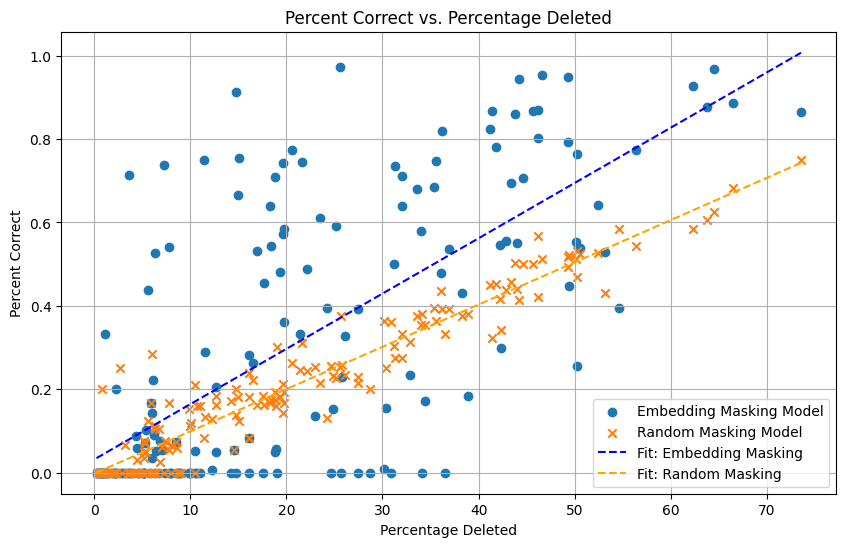

In [ ]:


import numpy as np
import matplotlib.pyplot as plt

# Assuming df2 and df3 are pandas DataFrames with columns 'Percentage Deleted' and 'Percent Correct'

# Fit regression lines
slope2, intercept2 = np.polyfit(df2['Percentage Deleted'], df2['Percent Correct'], 1)
slope3, intercept3 = np.polyfit(df3['Percentage Deleted'], df3['Percent Correct'], 1)

# Generate x values for regression lines
x_vals2 = np.linspace(df2['Percentage Deleted'].min(), df2['Percentage Deleted'].max(), 100)
y_vals2 = slope2 * x_vals2 + intercept2

x_vals3 = np.linspace(df3['Percentage Deleted'].min(), df3['Percentage Deleted'].max(), 100)
y_vals3 = slope3 * x_vals3 + intercept3

# Plot scatter and regression lines
plt.figure(figsize=(10, 6))
plt.scatter(df2['Percentage Deleted'], df2['Percent Correct'], label='Embedding Masking Model', marker='o')
plt.scatter(df3['Percentage Deleted'], df3['Percent Correct'], label='Random Masking Model', marker='x')

plt.plot(x_vals2, y_vals2, color='blue', linestyle='--', label='Fit: Embedding Masking')
plt.plot(x_vals3, y_vals3, color='orange', linestyle='--', label='Fit: Random Masking')

plt.xlabel('Percentage Deleted')
plt.ylabel('Percent Correct')
plt.title('Percent Correct vs. Percentage Deleted')
plt.legend()
plt.grid(True)
plt.show()


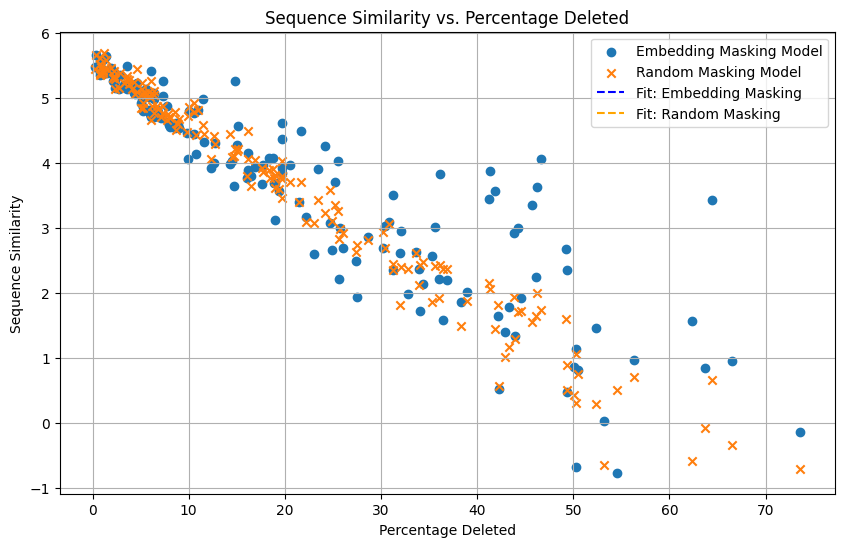

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df2 and df3 are pandas DataFrames with columns 'Percentage Deleted' and 'Sequence Similarity'
df2 = df2.dropna(subset=['Percentage Deleted', 'Sequence Similarity'])
df3 = df3.dropna(subset=['Percentage Deleted', 'Sequence Similarity'])

# Fit regression lines for Sequence Similarity
slope2, intercept2 = np.polyfit(df2['Percentage Deleted'], df2['Sequence Similarity'], 1)
slope3, intercept3 = np.polyfit(df3['Percentage Deleted'], df3['Sequence Similarity'], 1)

# Generate x values for regression lines
x_vals2 = np.linspace(df2['Percentage Deleted'].min(), df2['Percentage Deleted'].max(), 100)
y_vals2 = slope2 * x_vals2 + intercept2

x_vals3 = np.linspace(df3['Percentage Deleted'].min(), df3['Percentage Deleted'].max(), 100)
y_vals3 = slope3 * x_vals3 + intercept3

# Plot scatter and regression lines
plt.figure(figsize=(10, 6))
plt.scatter(df2['Percentage Deleted'], df2['Sequence Similarity'], label='Embedding Masking Model', marker='o')
plt.scatter(df3['Percentage Deleted'], df3['Sequence Similarity'], label='Random Masking Model', marker='x')

plt.plot(x_vals2, y_vals2, color='blue', linestyle='--', label='Fit: Embedding Masking')
plt.plot(x_vals3, y_vals3, color='orange', linestyle='--', label='Fit: Random Masking')

plt.xlabel('Percentage Deleted')
plt.ylabel('Sequence Similarity')
plt.title('Sequence Similarity vs. Percentage Deleted')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(len(allnuminterpro))
print(len(allpercentidentities))

111
111


In [ ]:
print(allpercentidentities)

[]


In [ ]:
#ok so far, 181 is good, 141, 101 were bad

In [ ]:
for idx, prompt in enumerate(df['substituted_seq']):
    random_indices = get_random_indices(prompt, 8)
    # Replace locations in prompt corresponding to indices in 'indices' with "_"
    target_seq = df.loc[df['substituted_seq'] == prompt, 'sequence'].iloc[0]
    for method in ['embedding', 'random']:
      if method == 'embedding':
        indices = embedding_masking_model(prompt, model, df, embeddings_dict,percentage=8)
        if not indices:
          continue
      elif method == 'random':
        indices = get_random_indices(prompt, 8)
      modified_prompt = list(prompt)
      for index in indices:
          modified_prompt[index] = "_"
      modified_prompt = "".join(modified_prompt)
      protein_prompt = ESMProtein(sequence=modified_prompt)

      #make the function annotations
      interpro_ids = embeddings_dict[df.iloc[idx]['Entry']]
      functionlist = []
      for interpro_id in interpro_ids['InterPro_ids']
        functionlist.append(f"FunctionAnnotation(label={interpro_id}, start=1, end={len(sequence)})")

      print(functionlist)
      #generate w/function annotations
      protein_prompt.function_annotations = get_keywords_from_interpro(functionlist)
      sequence_generation = model.generate(
          protein_prompt,
          GenerationConfig(
              track="sequence",
              num_steps=protein_prompt.sequence.count("_") // 2,
              temperature=0.5,
          ),
      )
      print("Generated Sequence: " + str(sequence_generation.sequence))
      generated_sequence = sequence_generation.sequence
      print("Target Sequence: " + str(target_seq))
      # Ensure sequences are of equal length
      if len(generated_sequence) != len(target_seq):
          raise ValueError("Sequences must be of the same length to calculate Hamming distance.")

      # Calculate Hamming distance
      hamming_distance = sum(1 for gen, target in zip(generated_sequence, target_seq) if gen != target)

      # Print results
      print("Hamming Distance:", hamming_distance)
      embeddings_dict[entry][f'{method}_hamming_distance'] = hamming_distance


100%|██████████| 9/9 [00:02<00:00,  3.28it/s]


Generated Sequence: MRSRKLTGGVRSSARLRARSYSSASLASARDVTESTSANTQTSFAKPHKATDRRTSKKFKYDKGHLVKAELQKLDIKSDISSLPKPAPVAPCENKFAEDSAEAAVSPPESVTPPQGCSTPASEEPSVKAENGESTEPSSAAPAQEPDDSSAGQAEPVPETEEVRPSVLQDDSSIFLDADSNQDMPVSDFFGNSELMQDLPPASPSYPSMSRREFRKMHFRAKDDEDDAEG
Target Sequence: MRSRKLTGGVRSSARLRARSYSSASLASARDVTSSTSAKTTCLASSSHKATDRRTSKKFKYDKGHLVKAELQKLDPKSDISSLPKVAPVAPCENKFAEDSAEAAVSVPESREPPQGCSTPASEEPSVKAENGLSTEPSSAAAAQEPDDSSAGQAEPVPRTEEVRASVLQMDSSIFLDDDSNQPMPVSRFFGNVELMQDLPPASSSYPSMSRREFRKMHFRAKDDEDDAEG
Hamming Distance: 24


100%|██████████| 14/14 [00:06<00:00,  2.07it/s]


Generated Sequence: MDGAPVAEFRPTMTHGGRYLLYDIFGNKFEVTNKYQPPIMPIGRGAYGIVCSVMNFETREMVAIKKIANAFNNDMDAKRTLREIKLLRHLDHENIIGIRDVIPPPIPQAFNDVYIATELMDTDLHHIIRSNQELSEEHCQYFLYQILRGLKYIHSANVIHRDLKPSNLLLNANCDLKICDFGLARPSSESDMMTEYVVTRWYRAPELLLNSTDYSAAIDVWSVGCIFMELINRQPLFPGRDHMHQMRLITEVIGTPTDDELGFIRNEDARKYMIVHYDFVMKSNRYIYDSFSEAALDLIERMLTFNPLQRITVEEALDHPYLERLHDPDDEPVAPTMFDFSFDEENLNEDQMKQLIFNEAKEYPPRIRF
Target Sequence: MDGAPVAEFRPTMTHGGRYLLYDIFGNKFEVTNKYQPPIMPIGRGAYGIVCSVMNFETREMVAIKKIANAFNNDMDAKRTLREIKLLRHLDHENIIGIRDVIPPPIPQAFNDVYIATELMDTDLHHIIRSNQELSEEHCQYFLYQILRGLKYIHSANVIHRDLKPSNLLLNANCDLKICDFGLARPSSESDMMTEYVVTRWYRAPELLLNSTDYSAAIDVWSVGCIFMELINRQPLFPGRDHMHQMRLITEVIGTPTDDELGFIRNEDARKYMRHLPQYPRRTFASMFPRVQPAALDLIERMLTFNPLQRITVEEALDHPYLERLHDIADEPICLEPFSFDFEQKALNEDQMKQLIFNEAIEMNPNIRY
Hamming Distance: 38


100%|██████████| 14/14 [00:06<00:00,  2.06it/s]


Generated Sequence: MDGAPVAEFRPEMTHGGRYLLYDIFGNKFEVTNKFAPPIMPIGRGAYGIVCSVMNFETREMVAIKKIANAFNNDMDAKRTLREIKLLRHLDHPNIINIRDVIPPPIPQAFNDVYIATELMDTDLHHIIRSNQELSEEHCQYFLYQILRGLKYIHSANVIHRDLKPSNLLLNANCDLKICDFGLARPSSESDIMTEYVVTRWYRAPELLLNSTDYTAAIDIWSVGCIFMEMITRQPLFPGRDHIHQMRLITEVIGGPTDDELGFIRNDDARKYMIVHYDFVMKRNRYFFDSFSEAALDLIEKMLTFNPLQRITVEEALDHPYLERLHDIADEPICLEPFSFDFEQKALNEDQMKQLIFNEAIEMNPNKRY
Target Sequence: MDGAPVAEFRPTMTHGGRYLLYDIFGNKFEVTNKYQPPIMPIGRGAYGIVCSVMNFETREMVAIKKIANAFNNDMDAKRTLREIKLLRHLDHENIIGIRDVIPPPIPQAFNDVYIATELMDTDLHHIIRSNQELSEEHCQYFLYQILRGLKYIHSANVIHRDLKPSNLLLNANCDLKICDFGLARPSSESDMMTEYVVTRWYRAPELLLNSTDYSAAIDVWSVGCIFMELINRQPLFPGRDHMHQMRLITEVIGTPTDDELGFIRNEDARKYMRHLPQYPRRTFASMFPRVQPAALDLIERMLTFNPLQRITVEEALDHPYLERLHDIADEPICLEPFSFDFEQKALNEDQMKQLIFNEAIEMNPNIRY
Hamming Distance: 34


100%|██████████| 8/8 [00:06<00:00,  1.16it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 148.00 MiB. GPU 0 has a total capacity of 14.75 GiB of which 105.06 MiB is free. Process 37384 has 14.64 GiB memory in use. Of the allocated memory 13.57 GiB is allocated by PyTorch, and 965.69 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
#assuming perfect masking

for idx, prompt in enumerate(df['substituted_seq']):
    random_indices = get_random_indices(prompt, 8)
    # Replace locations in prompt corresponding to indices in 'indices' with "_"
    target_seq = df.loc[df['substituted_seq'] == prompt, 'sequence'].iloc[0]
    indices = np.arange(df.iloc[idx]['del_start'],df.iloc[idx]['del_end']+1)
    modified_prompt = list(prompt)
    for index in indices:
        modified_prompt[index] = "_"
    modified_prompt = "".join(modified_prompt)
    protein_prompt = ESMProtein(sequence=modified_prompt)
    sequence_generation = model.generate(
        protein_prompt,
        GenerationConfig(
            track="sequence",
            num_steps=protein_prompt.sequence.count("_") // 2,
            temperature=0.5,
        ),
    )
    print("Generated Sequence: " + str(sequence_generation.sequence))
    generated_sequence = sequence_generation.sequence
    print("Target Sequence: " + str(target_seq))
    # Ensure sequences are of equal length
    if len(generated_sequence) != len(target_seq):
        raise ValueError("Sequences must be of the same length to calculate Hamming distance.")

    # Calculate Hamming distance
    hamming_distance = sum(1 for gen, target in zip(generated_sequence, target_seq))

    # Print result
    hamming_distance

    #calculate blosum scores

    for gen_residue, target_residue in zip(generated_sequence, target_seq):
        blosum_val =  matrix[gen_residue][target_residue]
        blosum_score += blosum_val

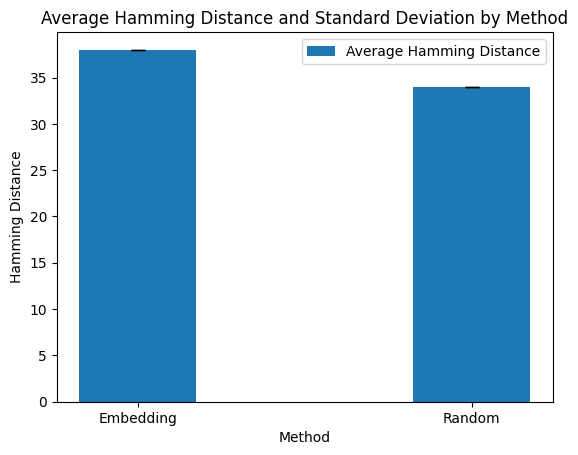

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract Hamming distances for 'embedding' and 'random' methods
embedding_distances = []
random_distances = []

# Iterate over embeddings_dict to gather the hamming distances
for entry in embeddings_dict.values():
    embedding_distance = entry.get('embedding_hamming_distance', None)
    random_distance = entry.get('random_hamming_distance', None)

    # Skip None values and collect valid distances
    if embedding_distance is not None:
        embedding_distances.append(embedding_distance)
    if random_distance is not None:
        random_distances.append(random_distance)

# Calculate average and standard deviation for both methods
embedding_avg = np.mean(embedding_distances) if embedding_distances else 0
embedding_std = np.std(embedding_distances) if embedding_distances else 0

random_avg = np.mean(random_distances) if random_distances else 0
random_std = np.std(random_distances) if random_distances else 0

# Prepare data for the bar plot
methods = ['Embedding', 'Random']
averages = [embedding_avg, random_avg]
std_devs = [embedding_std, random_std]

# Create the bar plot
fig, ax = plt.subplots()

# Set positions for the bars
bar_width = 0.35
index = np.arange(len(methods))

# Plot the bars with error bars
ax.bar(index, averages, bar_width, yerr=std_devs, capsize=5, label='Average Hamming Distance')

# Customize the plot
ax.set_xlabel('Method')
ax.set_ylabel('Hamming Distance')
ax.set_title('Average Hamming Distance and Standard Deviation by Method')
ax.set_xticks(index)
ax.set_xticklabels(methods)
ax.legend()

# Display the plot
plt.show()

In [ ]:
!pip install blosum
import blosum as bl
matrix = bl.BLOSUM(80)

In [ ]:
#final generate code:

allnuminterpro = []
allpercentmasks = df['percent_deleted'].tolist()
allindexes = []
sequence_similarity = []
masked_sequence = []
generated_sequence_list = []

for index,row in df.iterrows():
  if row["Entry"] not in embeddings_dict:
    continue
  allindexes.append(index)
  numinterpro = int(len(row['InterPro'])/10)
  allnuminterpro.append(numinterpro)
  #mask perfectly
  maskedindeces = np.arange(row['del_start'],row['del_end']+1)
  modified_prompt = list(row['substituted_seq'])
  for idx in maskedindeces:
      modified_prompt[idx] = "_"
  modified_prompt = "".join(modified_prompt)
  masked_sequence.append(modified_prompt)

  protein_prompt = ESMProtein(sequence=modified_prompt)
  #make the function annotations
  interpro_ids = embeddings_dict[df.iloc[index]['Entry']]
  functionlist = []
  for interpro_id in interpro_ids['InterPro_ids']:
    functionlist.append(FunctionAnnotation(label=interpro_id, start=1, end=len(modified_prompt)))

  #generate w/function annotations
  protein_prompt.function_annotations = get_keywords_from_interpro(functionlist)
  sequence_generation = model.generate(
      protein_prompt,
      GenerationConfig(
          track="sequence",
          num_steps=protein_prompt.sequence.count("_") // 2,
          temperature=0.5,
      ),
  )
  generated_sequence = sequence_generation.sequence
  generated_sequence_list.append(generated_sequence)
  # Ensure sequences are of equal length
  if len(generated_sequence) != len(row['sequence']):
      print("Sequences must be of the same length to calculate Hamming distance.")
      sequence_similarity.append(None)
  else:
      blosum_score = 0
      for gen_residue, target_residue in zip(generated_sequence, row['sequence']):
          blosum_val =  matrix[gen_residue][target_residue]
          blosum_score += blosum_val
      blosum_score = blosum_score / len(generated_sequence)
      sequence_similarity.append(blosum_score)

  torch.cuda.empty_cache()

shortenedpercentmasks = [allpercentmasks[i] for i in allindexes]
df3 = pd.DataFrame({
      'Number of Interpro Terms': allnuminterpro,
      'Percentage Deleted': shortenedpercentmasks,
      'Index': allindexes,
      'Sequence Similarity': sequence_similarity,
      'Generated Sequences': generated_sequence_list,
      'Masked Sequences': masked_sequence
  })

df3.to_csv('testrun_generatedfromperfectmask.csv')


100%|██████████| 4/4 [00:05<00:00,  1.28s/it]
/usr/local/lib/python3.10/dist-packages/esm/pretrained.py:46: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.

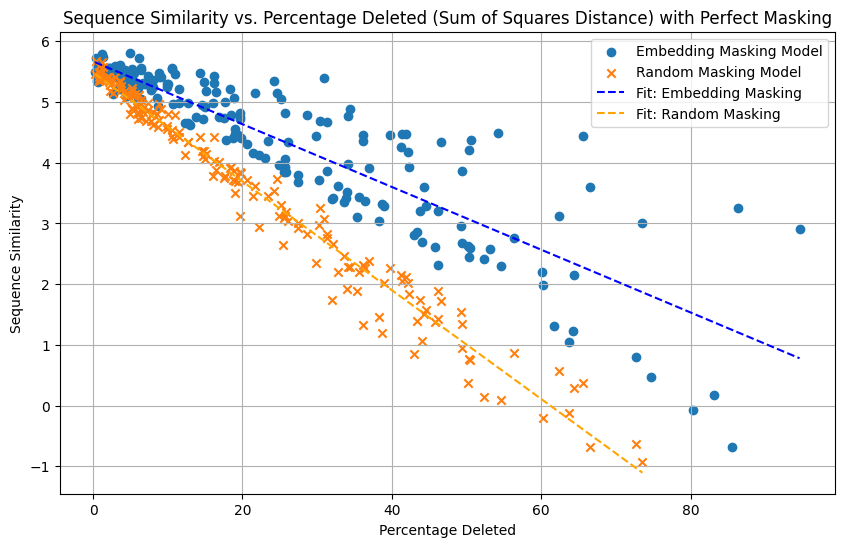

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df2 = pd.read_csv('/content/testrun_generatedfromperfectmask.csv')
df3 = pd.read_csv('/content/with_seq_similarity_random_output_full_sumSquare_fixed.csv')

# Assuming df2 and df3 are pandas DataFrames with columns 'Percentage Deleted' and 'Sequence Similarity'
df2 = df2.dropna(subset=['Percentage Deleted', 'Sequence Similarity'])
df3 = df3.dropna(subset=['Percentage Deleted', 'Sequence Similarity'])

# Drop rows with -infinity values
df2 = df2[(df2['Percentage Deleted'] != -np.inf) & (df2['Sequence Similarity'] != -np.inf)]
df3 = df3[(df3['Percentage Deleted'] != -np.inf) & (df3['Sequence Similarity'] != -np.inf)]

# Fit regression lines for Sequence Similarity
slope2, intercept2 = np.polyfit(df2['Percentage Deleted'], df2['Sequence Similarity'], 1)
slope3, intercept3 = np.polyfit(df3['Percentage Deleted'], df3['Sequence Similarity'], 1)

# Generate x values for regression lines
x_vals2 = np.linspace(df2['Percentage Deleted'].min(), df2['Percentage Deleted'].max(), 100)
y_vals2 = slope2 * x_vals2 + intercept2

x_vals3 = np.linspace(df3['Percentage Deleted'].min(), df3['Percentage Deleted'].max(), 100)
y_vals3 = slope3 * x_vals3 + intercept3

# Plot scatter and regression lines
plt.figure(figsize=(10, 6))
plt.scatter(df2['Percentage Deleted'], df2['Sequence Similarity'], label='Embedding Masking Model', marker='o')
plt.scatter(df3['Percentage Deleted'], df3['Sequence Similarity'], label='Random Masking Model', marker='x')

plt.plot(x_vals2, y_vals2, color='blue', linestyle='--', label='Fit: Embedding Masking')
plt.plot(x_vals3, y_vals3, color='orange', linestyle='--', label='Fit: Random Masking')

plt.xlabel('Percentage Deleted')
plt.ylabel('Sequence Similarity')
plt.title('Sequence Similarity vs. Percentage Deleted (Sum of Squares Distance) with Perfect Masking')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
for i,row in df.iterrows():

  embedding = embeddings_dict[entry]['embedding'] #list of embeddings for each interpro term



['protein_embedding_0.npy', 'protein_embedding_1.npy', 'protein_embedding_10.npy', 'protein_embedding_100.npy', 'protein_embedding_101.npy', 'protein_embedding_102.npy', 'protein_embedding_103.npy', 'protein_embedding_104.npy', 'protein_embedding_105.npy', 'protein_embedding_106.npy', 'protein_embedding_107.npy', 'protein_embedding_108.npy', 'protein_embedding_109.npy', 'protein_embedding_11.npy', 'protein_embedding_110.npy', 'protein_embedding_111.npy', 'protein_embedding_112.npy', 'protein_embedding_113.npy', 'protein_embedding_114.npy', 'protein_embedding_115.npy', 'protein_embedding_116.npy', 'protein_embedding_117.npy', 'protein_embedding_118.npy', 'protein_embedding_119.npy', 'protein_embedding_12.npy', 'protein_embedding_120.npy', 'protein_embedding_121.npy', 'protein_embedding_122.npy', 'protein_embedding_123.npy', 'protein_embedding_124.npy', 'protein_embedding_125.npy', 'protein_embedding_126.npy', 'protein_embedding_127.npy', 'protein_embedding_128.npy', 'protein_embedding_1